<table>
 <tr align=left><td><img align=left src="./images/CC-BY.png">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license. (c) Kyle T. Mandli</td>
</table>

In [ ]:
from __future__ import print_function

# Introdução ao NumPy

O NumPy é uma biblioteca básica em Python que define várias estruturas e funções essenciais para a computação numérica (entre outras coisas).  A estrutura de dados fundamental nesta biblioteca são  os `ndarray`,  de manipulações  semelhante às `list`s. Muitas funções são semelhantes aos comandos do matlab. Implementados usando algorimos semelhante. 

Tópicos:
  - O `ndarray`
  - Funções matemáticas
  - Manipulações de matriz
  - Funções comuns com array

## `ndarray`

O `ndarray` forma o tipo mais básico de estrutura de dados do NumPy. Como o nome sugere, o `ndarray` é uma matriz que pode ter tantas dimensões quanto se defina. Para utilizadores do matlab, isso é familiar, embora observe que o `ndarray` não se comporta exatamente como as matrizes do matlab. Aqui apresentamos alguns exemplos de usos:

In [1]:
import numpy

In [3]:
numpy?

Defina uma matriz 2x2, observe que, diferentemente do MATLAB, precisamos de vírgulas em todas as posições:

In [4]:
my_array = numpy.array([[1, 2], [3, 4]])
print(my_array)

[[1 2]
 [3 4]]


In [5]:
A = numpy.array([[1, 2 , 3], [3, 4, 5], [3, 4, 5]])

In [8]:
print(A)

[[1 2 3]
 [3 4 5]
 [3 4 5]]


Obtenha a entrada  `(0, 1)` da matriz:

In [ ]:
print(my_array)

In [9]:
my_array[0, 1]

2

In [10]:
A[2,2]

5

A segunda linha da matriz:

In [11]:
my_array[1,:]

array([3, 4])

A primeira coluna da matriz:

In [ ]:
print(my_array)

In [13]:
C= numpy.array([[3],[4]])

In [14]:
C

array([[3],
       [4]])

In [12]:
my_array[:,0]

array([1, 3])

In [ ]:
#my_array[?,?]

Definir um vetor de coluna: 

In [ ]:
my_vec = numpy.array([[1], [2]])
print(my_vec)

Multiplicação da matriz my_array pelo vetor my_vec no sentido usual em álgebra linear (equivalente ao * MATLAB )

In [ ]:
print(my_array)

In [ ]:
print(numpy.dot(my_array, my_vec))

Multiplicação de `my_array` e` my_vec` "broadcasting" as dimensões correspondentes (equivalente ao .* MATLAB ): 

In [ ]:
print(my_array)
print()
print(my_vec)

In [ ]:
my_array * my_vec

In [27]:
A =  numpy.array([[1, 2], [3, 4]])
C = numpy.array([[3],[4]])
C.dot(A)

ValueError: shapes (2,1) and (2,2) not aligned: 1 (dim 1) != 2 (dim 0)

In [24]:
C

array([[3],
       [4]])

In [21]:
D

array([[11],
       [25]])

## Construtores de matriz
Juntamente com o construtor comum para o `ndarray`s acima (`array`), existem várias outras maneiras de criar arrays com estruturas especificas. Aqui tem alguma das mais úteis.

O comando `linspace` (semelhante ao comando `linspace` do MATLAB) usa três argumentos, os dois primeiros definem um intervalo, o terceiro define o número pontos de uma partição entre eles. Isso é usado para decompor o domínio de uma função,  muito útil se quiser avaliar uma função numa parte do seu domínio.

In [29]:
A=numpy.linspace(-1, 1, 10)

In [30]:
A

array([-1.        , -0.77777778, -0.55555556, -0.33333333, -0.11111111,
        0.11111111,  0.33333333,  0.55555556,  0.77777778,  1.        ])

In [ ]:
print(numpy.linspace(-1, 1, 10))
#numpy.linspace?

Outras funções são `zeros` e `ones` que criam matriz de zeros e uns respetivamente (novamente equivalente às funções de mesmo nome no MATLAB). Note que pode definir explicitamente o tipo de dados a usar para preencher as matrizes.

In [31]:
numpy.zeros([3, 3])

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [35]:
type(2.0)

float

In [37]:
numpy.ones([2, 3, 4], dtype=float)

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]])

Outra matriz importante é a matriz de identidade. O comando `identity` pode ser usado para definir uma matriz de identidade de uma determinada ordem.

In [39]:
I = numpy.identity(5)
print(I)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


Observe que o tipo de uma matrizes NumPy  pode ser alterado após a sua criação. Isto é normalmente exigido quando se tem de alocar espaço para uma matriz que vai ser o output de um processo. No entanto  ajustar o tipo de uma matriz para satisfazer as exigências de output  estas é sempre difícil entender. Uma maneira de evitar esses problemas é criar uma matriz vazia do tipo certo e armazenar os valores calculados conforme os vai encontrando. O construtor da matriz para fazer isso é chamado de `empty`:

In [40]:
numpy.empty([2,3])

array([[1., 1., 1.],
       [1., 1., 1.]])

Observe que aqui o notebook IPython está a preencher a matriz com zeros (ou algo próximo disso). Os valores quase nunca são zero, mas a representação do número apresentado é truncada para tabular a exibição de números longos. Este comportamento pode ser controlado usando `%precision 3`, em que 3 é o número de casas decimais na representação.

In [42]:
%precision 30
numpy.empty([2,3]) + 1/3

array([[1.6666666666666665, 1.6666666666666665, 1.6666666666666665],
       [1.6666666666666665, 1.6666666666666665, 1.6666666666666665]])

## Manipulações de matriz
Às vezes, apesar de nossos esforços, precisamos manipular o tipo das matrizes criadas.
 - Note que essas funções são de difícil utilização  e muito ineficientes em termos computacionais.
 - No entanto quando usadas de forma inteligente podem ser usadas para simplificar algoritmos e otimizar o uso de memória..
 - Confire em [NumPy Docs](http://docs.scipy.org/doc/numpy/reference/routines.array-manipulation.html) para mais funções para além destas básicas

O tipo da matriz pode ser obtido através do sufixo `shape` (um dos atributos dum objeto array).

In [43]:
A = numpy.array([[1, 2, 3], [4, 5, 6]])
print(A)
print("Tipo = ", A.shape)


[[1 2 3]
 [4 5 6]]
Tipo =  (2, 3)


Podemos alterar o tipo  de uma matriz (fazer o ”reshape”)

In [44]:
B = A.reshape((6,1))
print("A Shape = ", A.shape)
print("B Shape = ", B.shape)
print(B)
#numpy.reshape?  

A Shape =  (2, 3)
B Shape =  (6, 1)
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]


Pegue na matriz `A` e faça uma matriz maior, preenchendo a nova matriz com cópias da primeira o vezes definido.

In [ ]:
A

In [45]:
numpy.tile(A, (2,3))

array([[1, 2, 3, 1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6, 4, 5, 6],
       [1, 2, 3, 1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6, 4, 5, 6]])

In [46]:
A.flatten()

array([1, 2, 3, 4, 5, 6])

## Operações de matriz

A biblioteca numpy também inclui várias operações básicas em matrizes. Por exemplo, uma das operação é a transposição de uma matriz dada.

In [47]:
B = numpy.array([[1,2,3],[1,4,9],[1,8,27]])
print(B)
print(B.transpose())

[[ 1  2  3]
 [ 1  4  9]
 [ 1  8 27]]
[[ 1  1  1]
 [ 2  4  8]
 [ 3  9 27]]


Um aspeto interessante da biblioteca numpy é que a multiplicação escalar é definida da maneira usual.

In [48]:
v = numpy.array([[1],[2],[3]])
print(v)
print(2*v)

[[1]
 [2]
 [3]]
[[2]
 [4]
 [6]]


Outra operação comum é multiplicar duas matrizes. Tenha cuidado para garantir que a operação está definida. No exemplo abaixo, a operação comentada não está definida.

In [49]:
A = numpy.array([[1],[-1],[1]]) # 3x1
B = numpy.array([[1,2,3],[1,4,9],[1,8,27]]) # 3x3
print(numpy.matmul(B,A)) #3x3  3x1
print(numpy.matmul(A.transpose(),B)) #1x3 3x3 A^t*B
#print(numpy.matmul(A,B))

[[ 2]
 [ 6]
 [20]]
[[ 1  6 21]]


In [50]:
print(numpy.matmul(A,B))

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 1)

Um entrada matriz pode ser alterado usando a mesma notação que usamos acima para obter o valor da entrada na dentro de uma matriz, usada agora numa atribuição.

In [51]:
B = numpy.array([[1,2,3],[1,4,9],[1,8,27]])
print(B)
B[0,0] = -5
print(B)

[[ 1  2  3]
 [ 1  4  9]
 [ 1  8 27]]
[[-5  2  3]
 [ 1  4  9]
 [ 1  8 27]]


## Funções matemáticas
Similar ao módulo Python `math`, o NumPy também tem várias funções matemáticas definidas, como` sqrt`, `sin`,` cos` e `tan`, além de várias constantes úteis, dos quais a mais importante é $\pi$. O benefício de usar as versões do NumPy é que elas podem ter por argumento matrizes.

In [54]:
%precision 3
x = numpy.linspace(-2.0 * numpy.pi, 2.0 * numpy.pi, 62)
print(x)
y = numpy.sin(x)
print(y)

[-6.283 -6.077 -5.871 -5.665 -5.459 -5.253 -5.047 -4.841 -4.635 -4.429
 -4.223 -4.017 -3.811 -3.605 -3.399 -3.193 -2.987 -2.781 -2.575 -2.369
 -2.163 -1.957 -1.751 -1.545 -1.339 -1.133 -0.927 -0.721 -0.515 -0.309
 -0.103  0.103  0.309  0.515  0.721  0.927  1.133  1.339  1.545  1.751
  1.957  2.163  2.369  2.575  2.781  2.987  3.193  3.399  3.605  3.811
  4.017  4.223  4.429  4.635  4.841  5.047  5.253  5.459  5.665  5.871
  6.077  6.283]
[ 2.449e-16  2.046e-01  4.005e-01  5.794e-01  7.339e-01  8.573e-01
  9.445e-01  9.917e-01  9.970e-01  9.601e-01  8.827e-01  7.679e-01
  6.206e-01  4.471e-01  2.547e-01  5.148e-02 -1.539e-01 -3.528e-01
 -5.367e-01 -6.979e-01 -8.297e-01 -9.263e-01 -9.838e-01 -9.997e-01
 -9.733e-01 -9.057e-01 -7.998e-01 -6.602e-01 -4.925e-01 -3.041e-01
 -1.028e-01  1.028e-01  3.041e-01  4.925e-01  6.602e-01  7.998e-01
  9.057e-01  9.733e-01  9.997e-01  9.838e-01  9.263e-01  8.297e-01
  6.979e-01  5.367e-01  3.528e-01  1.539e-01 -5.148e-02 -2.547e-01
 -4.471e-01 -6.206e-01

Esta estratégia é geralmente útil para desenhar o gráfico de funções (abordaremos a representação gráfica mais tarde).

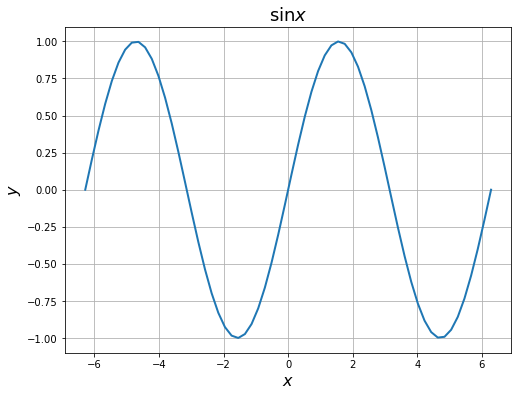

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(8,6))
plt.plot(x,y,linewidth=2)
plt.grid()
plt.xlabel('$x$',fontsize=16)
plt.ylabel('$y$',fontsize=16)
plt.title('$\sin{x}$',fontsize=18)
plt.show()

Uma coisa a observar (e isso é verdade no módulo `math`) é que, ao contrário do que você pode esperar:

In [56]:
x = numpy.linspace(-1, 1, 20)
print(x)
numpy.sqrt(x)

[-1.    -0.895 -0.789 -0.684 -0.579 -0.474 -0.368 -0.263 -0.158 -0.053
  0.053  0.158  0.263  0.368  0.474  0.579  0.684  0.789  0.895  1.   ]


<ipython-input-56-8ebddeb3afae>:3: RuntimeWarning: invalid value encountered in sqrt
  numpy.sqrt(x)


array([  nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan, 0.229, 0.397, 0.513, 0.607, 0.688, 0.761, 0.827, 0.889,
       0.946, 1.   ])

O problema é que, se `sqrt` tiver por argumento um número negativo, o NumPy não usará automaticamente variável `Complex` para representar o resultado. Ao contrário das listas, o NumPy exige que os dados armazenados numa matriz sejam todos do mesmo tipo. Por padrão, o NumPy assume que se quer usar `float`s  (vemos mais sobre isto na próxima aula) , como a operação não está definida para negativo gera `nan`s (`nan` significa "não é um número".

Se quiser realmente usar números complexos, tem de dizer explicitamente ao NumPy que quer  uma matriz de Complexos, fazendo o seguinte:

In [57]:
x = numpy.linspace(-1, 1, 20, dtype=complex)
numpy.sqrt(x)

array([0.   +1.j   , 0.   +0.946j, 0.   +0.889j, 0.   +0.827j,
       0.   +0.761j, 0.   +0.688j, 0.   +0.607j, 0.   +0.513j,
       0.   +0.397j, 0.   +0.229j, 0.229+0.j   , 0.397+0.j   ,
       0.513+0.j   , 0.607+0.j   , 0.688+0.j   , 0.761+0.j   ,
       0.827+0.j   , 0.889+0.j   , 0.946+0.j   , 1.   +0.j   ])

### Exercício 1
Implemente uma função que dada uma matriz, devolve a tipo da matriz.

In [58]:
A = numpy.array([[1, 2, 3], [4, 5, 6]])
print(A)
print("Tipo = ", A.shape)

[[1 2 3]
 [4 5 6]]
Tipo =  (2, 3)


In [59]:
def tipo(M):
    return M.shape

In [60]:
tipo(A)

(2, 3)

### Exercício 2
Implemente uma função que dada duas matrizes $A$ e $B$, devolve devolve `True` se e só se as duas matrizes são compaíveis, i.e. se $A\times B$ está definida.

In [61]:
def comp(A,B):
    l1=A.shape #l1=(al,ac)
    l2=B.shape #l2=(bl,bc)
    return l1[1]==l2[0]

In [63]:
A # 2x3

array([[1, 2, 3],
       [4, 5, 6]])

In [62]:
comp(A,A)

False

In [64]:
B = numpy.array([[1, 2], [4, 5]]) #2x2

In [66]:
comp(B,A)

True

### Exercício 3
Implemente uma função que dada duas matrizes $A$ e $B$, devolve devolve $A\times B$ o produto de $A$ por $B$ caso esteja definido, caso contrário deve devolver `nan` (i.e, `numpy.NaN`).

In [ ]:
def mul(A,B):
    C=
    for i=:
        for j=:
            for K=:
            C[i,j]=
    return C